# To Click or Not to Click - An Advertisement Click Rate Prediction

In this project we will be working with a data set indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* __Daily Time Spent on Site__: consumer time on site in minutes
* __Age__: cutomer age in years
* __Area Income__: Avg. Income of geographical area of consumer
* __Daily Internet Usage__: Avg. minutes a day consumer is on the internet
* __Ad Topic Line__: Headline of the advertisement
* __City__: City of consumer
* __Male__: Whether or not consumer was male
* __Country__: Country of consumer
* __Timestamp__: Time at which consumer clicked on Ad or closed window
* __Clicked on Ad__: 0 or 1 indicated clicking on Ad


# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

# Get the Data

In [4]:
adv = pd.read_csv('advertising.csv')

In [5]:
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


# Variable Content

In [6]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


* 1) Daily Time Spent on Site --> numerical
* 2) Age --> numerical
* 3) Area Income --> numerical
* 4) Daily Internet Usage --> numerical
* 5) Male --> numerical
* 6) Clicked on Ad --> numerical
--------------------------------------
* 7) Ad Topic Line --> object
* 8) City --> object
* 9) Country --> object
* 10) Timestamp --> object

In [7]:
# numeric variables overview
adv.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Check for Missing or Duplicated Data

<AxesSubplot:>

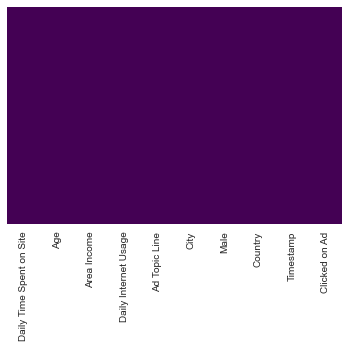

In [8]:
sns.heatmap(data = adv.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

* No missing data

In [11]:
adv.duplicated().value_counts()

False    1000
dtype: int64

* No duplicated data

# Exploratory Data Analysis - EDA

## Numerical Variables

### Daily Time Spent on Site vs Clicked on Ad

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Count'>

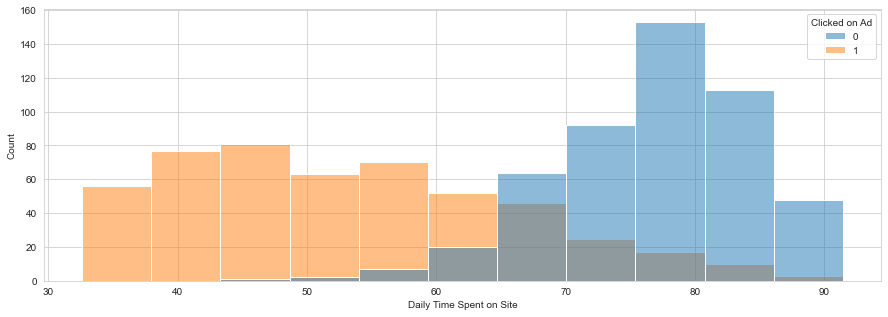

In [12]:
plt.figure(figsize=(15,5))
sns.histplot(data = adv, x = 'Daily Time Spent on Site', hue = 'Clicked on Ad')

* Data indicates strong inverse relationship between Daily Time Spent on Site and Clicked on Ad

### Age vs Clicked on Ad

<AxesSubplot:xlabel='Age', ylabel='Count'>

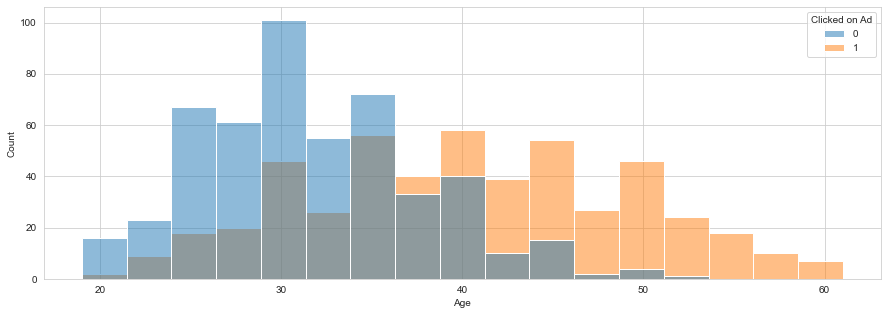

In [13]:
plt.figure(figsize=(15,5))
sns.histplot(data = adv, x = 'Age', hue = 'Clicked on Ad')

* Data indicates some relationship between Age and Clicked on Ad

### Area Income vs Clicked on Ad

<AxesSubplot:xlabel='Area Income', ylabel='Count'>

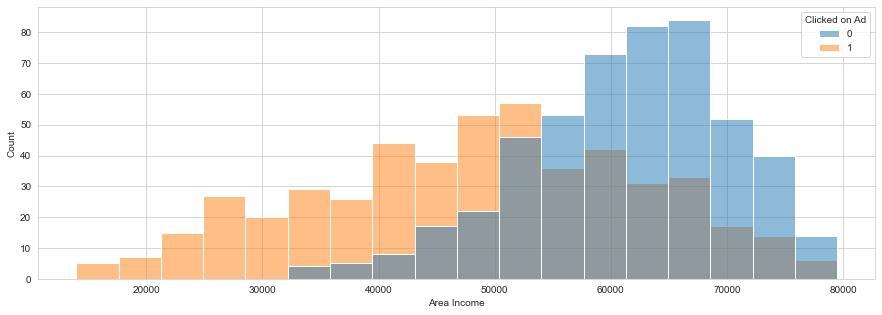

In [14]:
plt.figure(figsize=(15,5))
sns.histplot(data = adv, x = 'Area Income', hue = 'Clicked on Ad')

* Data indicates some relationship between Area Income and Clicked on Ad

### Daily Internet Usage vs Clicked on Ad

<AxesSubplot:xlabel='Daily Internet Usage', ylabel='Count'>

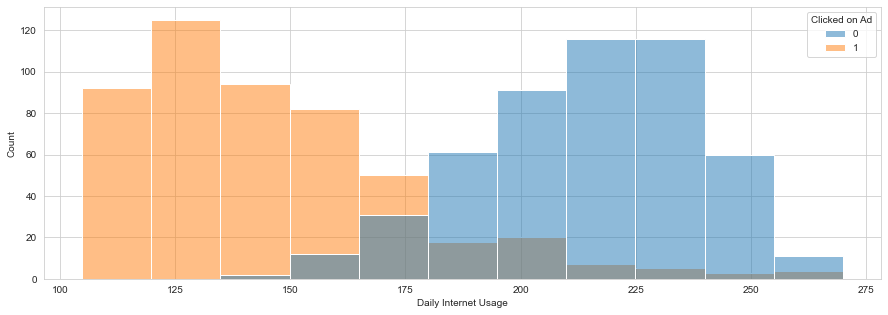

In [15]:
plt.figure(figsize=(15,5))
sns.histplot(data = adv, x = 'Daily Internet Usage', hue = 'Clicked on Ad')

* Data indicates strong inverse relationship between Daily Internet Usage and Clicked on Ad

### Male vs Clicked on Ad

<AxesSubplot:xlabel='Male', ylabel='count'>

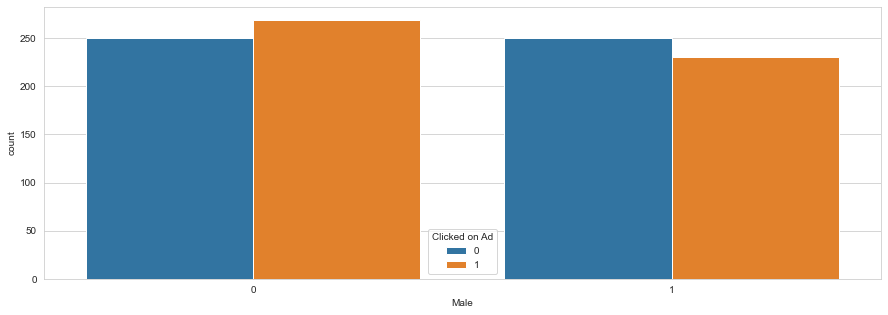

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(data = adv, x = 'Male', hue = 'Clicked on Ad')

* Data indicates low or no relationship between Male and Clicked on Ad

## Categorical Variables

### Ad Topic Line

In [17]:
adv['Ad Topic Line'].value_counts()

Cloned 5thgeneration orchestration              1
Synchronized multi-tasking ability              1
Customer-focused impactful success              1
Open-source optimizing parallelism              1
Organic logistical adapter                      1
                                               ..
Enhanced zero tolerance Graphic Interface       1
De-engineered tertiary secured line             1
Reverse-engineered well-modulated capability    1
Integrated coherent pricing structure           1
Virtual 5thgeneration emulation                 1
Name: Ad Topic Line, Length: 1000, dtype: int64

* The raw data presents no use for the model or apparent pattern for feature engineering

### City

In [18]:
adv['City'].value_counts()

Lisamouth         3
Williamsport      3
Wrightburgh       2
Lake Jose         2
Robertfurt        2
                 ..
Burgessside       1
Hurleyborough     1
Garychester       1
East Kevinbury    1
Ronniemouth       1
Name: City, Length: 969, dtype: int64

* The raw data presents no use for the model or apparent pattern for feature engineering

### Country

In [19]:
adv['Country'].value_counts()

France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

* The raw data presents no use for the model
* Feature engineering --> possible categories through continents segmentation

### Timestamp

In [20]:
adv['Timestamp'].value_counts()

2016-03-27 00:53:11    1
2016-01-07 23:02:43    1
2016-04-05 08:18:45    1
2016-04-17 18:38:14    1
2016-02-03 16:54:33    1
                      ..
2016-03-13 13:50:25    1
2016-07-16 14:13:54    1
2016-04-18 00:49:33    1
2016-07-17 01:13:56    1
2016-06-03 21:43:21    1
Name: Timestamp, Length: 1000, dtype: int64

* The raw data presents no use for the model
* Feature engineering --> possible categories through day of the week or parts of the day segmentation

## Variable Correlation

<AxesSubplot:>

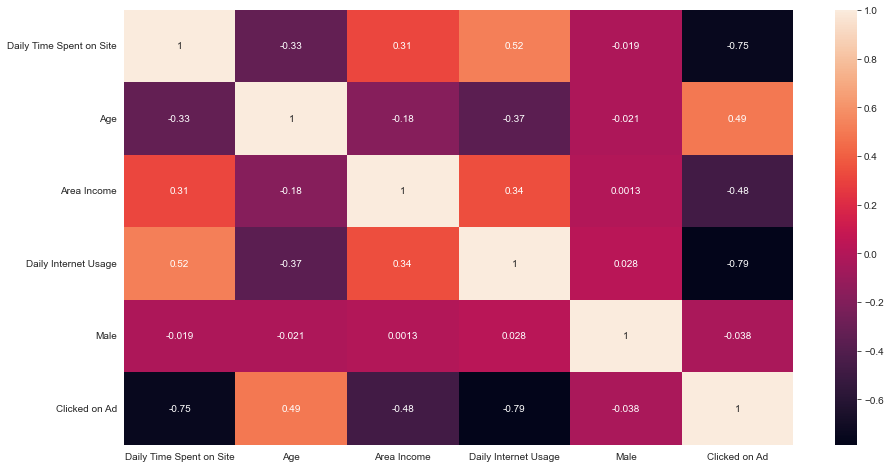

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(data = adv.corr(), annot = True)

Correlation Tier Hypothesis:
* 1) Daily Internet Usage: -0.79
* 2) Daily Time Spent on Site: -0.75
* 3) Age: 0.49
* 4) Area Income: -0.48
* 5) Male: -0.038

# Normalizing Variables

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(adv[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']])

StandardScaler()

In [25]:
scaled_features = scaler.transform(adv[['Daily Time Spent on Site', 'Age', 'Area Income',
                                        'Daily Internet Usage', 'Male']])

In [26]:
adv_feat = pd.DataFrame(data = scaled_features, columns = [['Daily Time Spent on Site', 'Age', 'Area Income',
                                        'Daily Internet Usage', 'Male']])

In [27]:
adv_feat.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.249267,-0.114905,0.509691,1.734030,-0.962695
1,0.961132,-0.570425,1.002530,0.313805,1.038750
2,0.282083,-1.139826,0.356949,1.287589,-0.962695
3,0.577432,-0.798185,-0.014456,1.501580,1.038750
4,0.212664,-0.114905,1.408868,1.038731,-0.962695


# Training and Testing Data

In [28]:
X = adv_feat
y = adv['Clicked on Ad']

In [29]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Training the Model

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
model = LogisticRegression()

In [100]:
model.fit(X_train, y_train)

C:\Users\breno\anaconda3\envs\dsdegree\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression()

## Predicting Test Data

In [89]:
pred = model.predict(X_test)

C:\Users\breno\anaconda3\envs\dsdegree\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


## Evaluating the Model

### Test Size = 0.2

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[104   1]
 [  4  91]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       105
           1       0.99      0.96      0.97        95

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



### ROC Curve

In [96]:
from sklearn.metrics import roc_curve

In [ ]:
from sklearn.metrics import roc_auc_score

ROC AUC : 0.9761


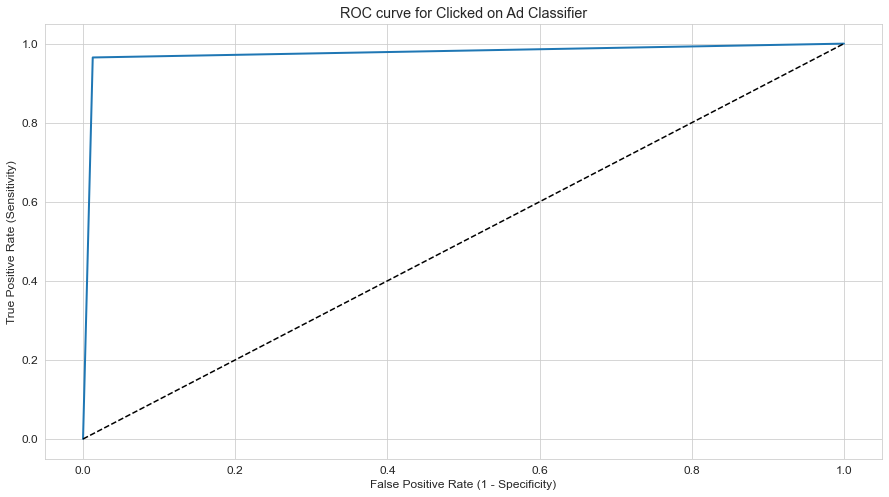

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label = True)

plt.figure(figsize=(15,8))

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Clicked on Ad Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

ROC_AUC = roc_auc_score(y_test, pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

### Test Size = 0.3

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [102]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[155   2]
 [  5 138]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



C:\Users\breno\anaconda3\envs\dsdegree\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\breno\anaconda3\envs\dsdegree\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


### ROC Curve

ROC AUC : 0.9761


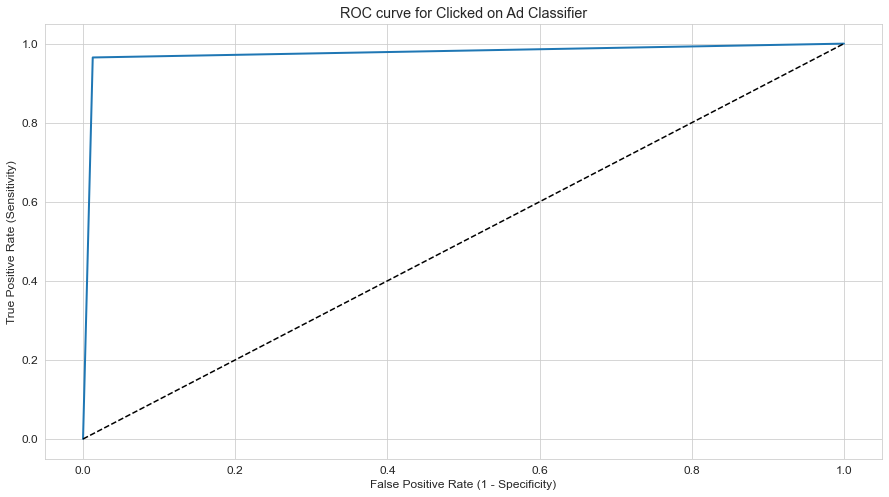

In [104]:
Rfpr, tpr, thresholds = roc_curve(y_test, pred, pos_label = True)

plt.figure(figsize=(15,8))

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Clicked on Ad Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

ROC_AUC = roc_auc_score(y_test, pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

## Conclusions 💯
* The data __indicates__ that a __Logistic Regression Model__ is an __excellent__ predictor of whether or not a customer would click on this company's Ad.


* The data __also__ indicates the following relationships:  
  
  1) The __greater__ the Internet Usage, the __lower__ the odds of clicking on the Ad  
  2) The __greater__ the Time Spent on Site, the __lower__ the odds of clicking on the Ad  
  3) The __greater__ the Area Income, the __lower__ the odds of clicking on the Ad  
  4) The __greater__ the Age, the __higher__ the odds of cliking on the Ad  
  5) __Gender__ has __little or no relationship__ with clicking on the add or not  


* If the __company's goal__ was to target __older__, __low area income__ and __both genders__ of customers, the Ad seems to __perform well__.


* __However__, if the company's goal was to target any of these __specific groups__ or __any combination__ between them:

  1) Specifically __younger customers__  
  2) Specifically __Men__  
  3) Specifically __Women__  
  4) Specifically __higher income customers__


* The Ad __does not seem__ to convert the right __type__ of customers.